In [ ]:
import json
import os
import base64

from collections.abc import Generator
from typing import Any

import fitz

from dify_plugin import Tool
from dify_plugin.entities.tool import ToolInvokeMessage
from dify_plugin.file.file import File


In [5]:
# doc: https://pymupdf.readthedocs.io/en/latest/textpage.html#block-dictionaries
pdf_path = "test.pdf"
doc = fitz.open(pdf_path)
blocks = json.loads(doc[0].get_text("json"))['blocks']

In [13]:
blocks

[{'number': 0,
  'type': 0,
  'bbox': [90.0, 73.85167694091797, 192.0, 101.45167541503906],
  'lines': [{'spans': [{'size': 12.0,
      'flags': 4,
      'bidi': 0,
      'char_flags': 16,
      'font': 'SimSun',
      'color': 0,
      'alpha': 255,
      'ascender': 0.859000027179718,
      'descender': -0.14000000059604645,
      'text': '图片上面第一行字',
      'origin': [90.0, 84.16999816894531],
      'bbox': [90.0, 73.85167694091797, 192.0, 85.85167694091797]}],
    'wmode': 0,
    'dir': [1.0, 0.0],
    'bbox': [90.0, 73.85167694091797, 192.0, 85.85167694091797]},
   {'spans': [{'size': 12.0,
      'flags': 4,
      'bidi': 0,
      'char_flags': 16,
      'font': 'SimSun',
      'color': 0,
      'alpha': 255,
      'ascender': 0.859000027179718,
      'descender': -0.14000000059604645,
      'text': '图片上面第二行字',
      'origin': [90.0, 99.7699966430664],
      'bbox': [90.0, 89.45167541503906, 192.0, 101.45167541503906]}],
    'wmode': 0,
    'dir': [1.0, 0.0],
    'bbox': [90.0, 89.4

In [22]:
doc[0].get_images()

[(14, 0, 1024, 684, 8, 'DeviceRGB', '', 'IM14', 'DCTDecode')]

图片上面第一行字
图片上面第二行字


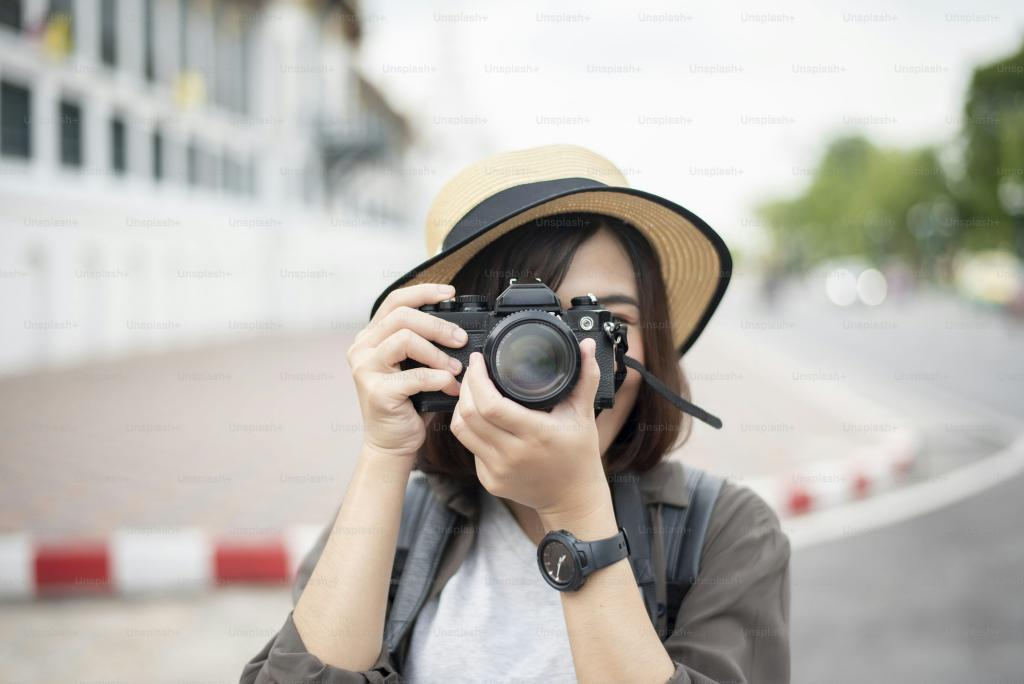

图片下面


In [33]:
for block in blocks:

    block_type = block['type']

    # text
    if block_type == 0:
        for line in block['lines']:
            print(line['spans'][0]['text'])
    # image
    elif block_type == 1:
        display(stringToImage(block['image']))

In [35]:
import io


# Take in base64 string and return PIL image
def stringToImage(base64_string):
    imgdata = base64.b64decode(base64_string)
    return Image.open(io.BytesIO(imgdata))


res = stringToImage("iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAApgAAAKYB3X3/OAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAANCSURBVEiJtZZPbBtFFMZ/M7ubXdtdb1xSFyeilBapySVU8h8OoFaooFSqiihIVIpQBKci6KEg9Q6H9kovIHoCIVQJJCKE1ENFjnAgcaSGC6rEnxBwA04Tx43t2FnvDAfjkNibxgHxnWb2e/u992bee7tCa00YFsffekFY+nUzFtjW0LrvjRXrCDIAaPLlW0nHL0SsZtVoaF98mLrx3pdhOqLtYPHChahZcYYO7KvPFxvRl5XPp1sN3adWiD1ZAqD6XYK1b/dvE5IWryTt2udLFedwc1+9kLp+vbbpoDh+6TklxBeAi9TL0taeWpdmZzQDry0AcO+jQ12RyohqqoYoo8RDwJrU+qXkjWtfi8Xxt58BdQuwQs9qC/afLwCw8tnQbqYAPsgxE1S6F3EAIXux2oQFKm0ihMsOF71dHYx+f3NND68ghCu1YIoePPQN1pGRABkJ6Bus96CutRZMydTl+TvuiRW1m3n0eDl0vRPcEysqdXn+jsQPsrHMquGeXEaY4Yk4wxWcY5V/9scqOMOVUFthatyTy8QyqwZ+kDURKoMWxNKr2EeqVKcTNOajqKoBgOE28U4tdQl5p5bwCw7BWquaZSzAPlwjlithJtp3pTImSqQRrb2Z8PHGigD4RZuNX6JYj6wj7O4TFLbCO/Mn/m8R+h6rYSUb3ekokRY6f/YukArN979jcW+V/S8g0eT/N3VN3kTqWbQ428m9/8k0P/1aIhF36PccEl6EhOcAUCrXKZXXWS3XKd2vc/TRBG9O5ELC17MmWubD2nKhUKZa26Ba2+D3P+4/MNCFwg59oWVeYhkzgN/JDR8deKBoD7Y+ljEjGZ0sosXVTvbc6RHirr2reNy1OXd6pJsQ+gqjk8VWFYmHrwBzW/n+uMPFiRwHB2I7ih8ciHFxIkd/3Omk5tCDV1t+2nNu5sxxpDFNx+huNhVT3/zMDz8usXC3ddaHBj1GHj/As08fwTS7Kt1HBTmyN29vdwAw+/wbwLVOJ3uAD1wi/dUH7Qei66PfyuRj4Ik9is+hglfbkbfR3cnZm7chlUWLdwmprtCohX4HUtlOcQjLYCu+fzGJH2QRKvP3UNz8bWk1qMxjGTOMThZ3kvgLI5AzFfo379UAAAAASUVORK5CYII=")

In [34]:
res